# 目的
Cifar10-C, Cifar100-CデータセットはオリジナルのCifar10, 100のテストセット1万件を5レベルのノイズで加工したものらしいのでそれをチェックする．

In [15]:
import os, sys
sys.path.append("../src")
import numpy as np
from utils.vit_util import ViTExperiment
import datasets
from datasets import Dataset, DatasetInfo, DatasetDict, load_dataset
from PIL import Image
dataset_dir = ViTExperiment.DATASET_DIR

In [16]:
def arr2img(arr):
    """
    (n, h, w, c)の形状のnumpy配列をn個のPIL.Imageのリストに変換して返す
    """
    imgs = []
    for a in arr:
        imgs.append(Image.fromarray(a))
    return imgs

In [17]:
def corr_check(ds):
    ds_raw_dir = os.path.join(dataset_dir, f"{ds}c/raw_data")
    # ラベルを取得
    labels = np.load(os.path.join(ds_raw_dir, os.path.join(ds_raw_dir, "labels.npy")))
    print(f"labels = {labels} {labels.shape}")
    # 先頭から1万件ごとに切り出して比較
    offs = 10000
    sliced_lists = [labels[i:i+offs] for i in range(0, len(labels), offs)]
    print(sliced_lists)
    # sliced_listsの各リストの全要素が同じかをチェック
    for i, l in enumerate(sliced_lists):
        if np.all(l == sliced_lists[0]):
            print(f"{i}: all same")
        else:
            print(f"{i}: not same")

In [19]:
corr_check("c10")

labels = [3 8 8 ... 5 1 7] (50000,)
[array([3, 8, 8, ..., 5, 1, 7], dtype=uint8), array([3, 8, 8, ..., 5, 1, 7], dtype=uint8), array([3, 8, 8, ..., 5, 1, 7], dtype=uint8), array([3, 8, 8, ..., 5, 1, 7], dtype=uint8), array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)]
0: all same
1: all same
2: all same
3: all same
4: all same


In [20]:
corr_check("c100")

labels = [49 33 72 ... 51 42 70] (50000,)
[array([49, 33, 72, ..., 51, 42, 70], dtype=uint8), array([49, 33, 72, ..., 51, 42, 70], dtype=uint8), array([49, 33, 72, ..., 51, 42, 70], dtype=uint8), array([49, 33, 72, ..., 51, 42, 70], dtype=uint8), array([49, 33, 72, ..., 51, 42, 70], dtype=uint8)]
0: all same
1: all same
2: all same
3: all same
4: all same


上からわかること：c10c, c100cは5万件の画像からなるが，オリジナルは1万枚の画像である．

In [30]:
import matplotlib.pyplot as plt
def corr_ds(ds, idx):
    ds_raw_dir = os.path.join(dataset_dir, f"{ds}c/raw_data")
    # ラベルを取得
    labels = np.load(os.path.join(ds_raw_dir, os.path.join(ds_raw_dir, "labels.npy")))
    offs = 10000
    # ファイル名の取得
    npy_files = [f for f in os.listdir(ds_raw_dir) if f.endswith(".npy")]
    
    # .npy以前の名前をキーとしてDatasetDictを作成する
    noise_type_idx = 0
    for npy_file in [npy_files[noise_type_idx]]:
        key = npy_file.split(".npy")[0]
        print(key)
        if key == "labels":
            continue
        ds_arr = np.load(os.path.join(ds_raw_dir, npy_file))
        # ここでnumpy.arrayからPIL Imageに変換することでcifar10のオリジナルと同じ形式にする
        ds_arr = arr2img(ds_arr)
    for i in range(0, len(ds_arr), offs):
        plt.imshow(ds_arr[i+idx])
        plt.show()

defocus_blur


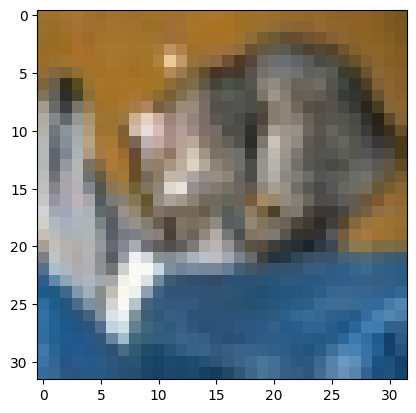

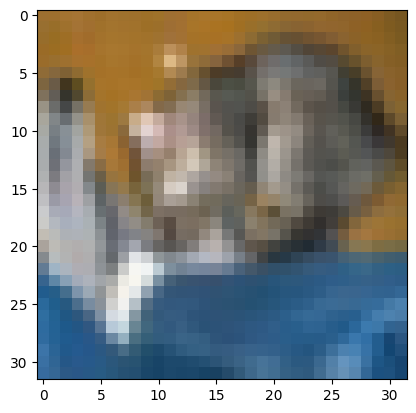

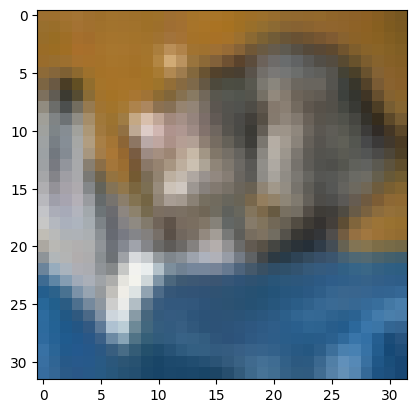

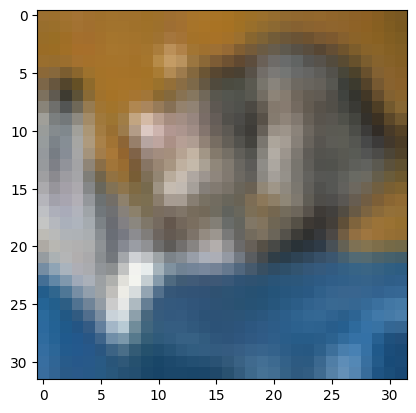

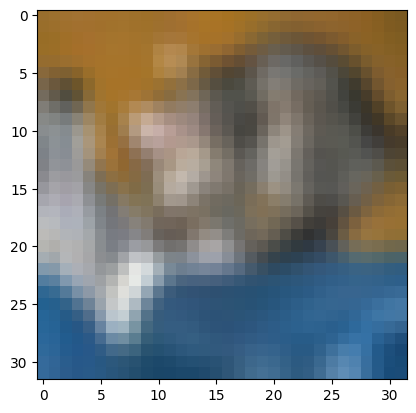

In [31]:
corr_ds("c10", 0)

上からわかること：i番めと(i+10000)番めの画像では，同じ画像に同じ種類のノイズを加えたものだが，そのseverityが違う